In [1]:
from cdcm import *

# Function

Function class is formed by directly inheriting Node
class. Hence it has all the properties of Node class.
Function class represents function node. The parents and children of Function
node are Variables. A function node takes the values of the parents as input and
sets the values of its children. A Function object can be made in different ways.
Each of which differs by the compactness and elegance.<br>

## Order of evaluation - Topological sort
In CDCM, each component is represented as a node in a directed acyclic graph (DAG). The dependencies between the nodes are represented as arrow edges with arrow being pointed towards the dependent variable. For evaluating functions, systems in CDCM, topological sort of DAG is used. Topological sort gives the order in which the nodes of the graph should be evaluated. The order of evaluation will start with nodes corresponding to independent quantities. These nodes will have arrow edges only going out. Once these nodes are evaluated, nodes which can be fully evaluated using the values of these independent nodes are evaluated next. This procedure is continued untill all the nodes of DAG are evaluated.

### Function with one input and one output

Let us consider a simple function ```f``` which takes one input node ```node_in```. The function evaluates the function expression using the input node value and assigns / updates the value to the output node ```node_out```. The graph of this function is as shown below. Order of evaluation of this graph will be: ``` node_in, f, node_out```

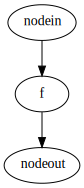

In [2]:
from graphviz import Digraph
g = Digraph('Function')
g.node('node_in', label='<node<sub>in</sub>>')
g.node('node_out', label='<node<sub>out</sub>>')
g.node('f')
g.edge('node_in', 'f')
g.edge('f', 'node_out')
#g.render('Function', format='png')
g

#### Using standard function defnition
Here the function is constructed separately and is passed as an argument while creating Function object.

In [3]:
def func(x):
    return x**3 + x**2

node_in = make_node("V:node_in:0.5:m")
node_out = make_node("V:node_out", units="m")

f = Function(
    name="f",
    func=func,
    parents=node_in,
    children=node_out
)
print(f)

f:
  description: ''
  owner: ''
  parents: ('node_in',)
  children: ('node_out',)
  func: !!python/name:__main__.func ''



In [4]:
print("Before we call forward:")
print(node_out)
print("After we call forward:")
f.forward()
print(node_out)
print(node_in)

Before we call forward:
node_out:
  description: ''
  owner: ''
  parents: ('f',)
  children: ()
  value: None
  units: m
  track: true

After we call forward:
node_out:
  description: ''
  owner: ''
  parents: ('f',)
  children: ()
  value: 0.375
  units: m
  track: true

node_in:
  description: ''
  owner: ''
  parents: ()
  children: ('f',)
  value: 0.5
  units: m
  track: true



#### Using lambda
Here Python's lambda function feature is used to create a Function object. This is compact than the previously mentioned way of making a Function object.

In [5]:
node_in = make_node("V:node_in:0.5:m")
node_out = make_node("V:node_out", units="m")

f = Function(
    name="f",
    func=lambda x: x ** 3 + x**2,
    parents=node_in,
    children=node_out
)
print(f)

f:
  description: ''
  owner: ''
  parents: ('node_in',)
  children: ('node_out',)
  func: !!python/name:__main__.%3Clambda%3E ''



In [6]:
print("Before we call forward:")
print(node_out)
print("After we call forward:")
f.forward()
print(node_out)
print(node_in)

Before we call forward:
node_out:
  description: ''
  owner: ''
  parents: ('f',)
  children: ()
  value: None
  units: m
  track: true

After we call forward:
node_out:
  description: ''
  owner: ''
  parents: ('f',)
  children: ()
  value: 0.375
  units: m
  track: true

node_in:
  description: ''
  owner: ''
  parents: ()
  children: ('f',)
  value: 0.5
  units: m
  track: true



#### Using python decorator @make_function
The Function object ```f``` is created under the decorator as shown below. The child node ```node_out``` is given as argument to ```@make_function```. The parent node ```node_in``` is given as argument to the function ```f``` defined under the decorator. The function ```f``` evaluates the functional form and returns the value to be assigned to the child node.

In [7]:
node_in = make_node("V:node_in:0.5:m")
node_out = make_node("V:node_out", units="m")

@make_function(node_out)
def f(x=node_in):
    return x ** 3 + x**2
print(f)
print(node_in)
print(node_out)

f:
  description: ''
  owner: ''
  parents: ('node_in',)
  children: ('node_out',)
  func: !!python/name:__main__.f ''

node_in:
  description: ''
  owner: ''
  parents: ()
  children: ('f',)
  value: 0.5
  units: m
  track: true

node_out:
  description: ''
  owner: ''
  parents: ('f',)
  children: ()
  value: None
  units: m
  track: true



In [8]:
print("Before we call forward:")
print(node_out)
print("After we call forward:")
f.forward()
print(node_out)

Before we call forward:
node_out:
  description: ''
  owner: ''
  parents: ('f',)
  children: ()
  value: None
  units: m
  track: true

After we call forward:
node_out:
  description: ''
  owner: ''
  parents: ('f',)
  children: ()
  value: 0.375
  units: m
  track: true



### Function with multiple inputs and one output

Here we consider a function ```g``` which takes two input nodes ```n1 & n2```. The function evaluates the function expression using the input node values and assigns / updates the value to the output node ```n3```. The graph of this function is as shown below. Order of evaluation of this graph will be: ``` n1, n2, f, n3``` or ``` n2, n1, f, n3```.

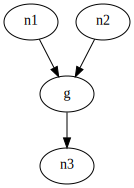

In [20]:
from graphviz import Digraph
g = Digraph('Function')
g.node('n1', label='<n<sub>1</sub>>')
g.node('n2', label='<n<sub>2</sub>>')
g.node('n3', label='<n<sub>3</sub>>')
g.node('g')
g.edge('n1', 'g')
g.edge('n2', 'g')
g.edge('g', 'n3')
#g.render('Function', format='png')
g

In [9]:
n1 = make_node("V:n1:0.6:m/s")
n2 = make_node("V:n2:1.0:m/s")
n3 = make_node("V:n3")
@make_function(n3)
def g(x=n1, y=n2):
    return x + y
print(g)

g:
  description: ''
  owner: ''
  parents: ('n1', 'n2')
  children: ('n3',)
  func: !!python/name:__main__.g ''



In [10]:
print("Before we call forward:")
print(n3)
print("After we call forward:")
g.forward()
print(n3)

Before we call forward:
n3:
  description: ''
  owner: ''
  parents: ('g',)
  children: ()
  value: None
  units: ''
  track: true

After we call forward:
n3:
  description: ''
  owner: ''
  parents: ('g',)
  children: ()
  value: 1.6
  units: ''
  track: true



### Function with multiple inputs and  outputs

Here we consider a function ```g``` which takes two input nodes ```n1 & n2```. The function evaluates the function expression using the input node values and assigns / updates the value to the output nodes ```n3 & n4```. The graph of this function is as shown below. One of the order of evaluations of this graph will be: ``` n1, n2, f, n3, n4```. Order of evaluation of input nodes can be in any order. For egs, ```n1, n2``` and ```n2, n1``` order of evaluations are equivalent. Same concept applies for output nodes as well.

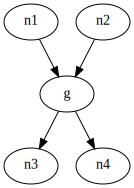

In [15]:
from graphviz import Digraph
g = Digraph('Function')
g.node('n1', label='<n<sub>1</sub>>')
g.node('n2', label='<n<sub>2</sub>>')
g.node('n3', label='<n<sub>3</sub>>')
g.node('n4', label='<n<sub>4</sub>>')
g.node('g')
g.edge('n1', 'g')
g.edge('n2', 'g')
g.edge('g', 'n3')
g.edge('g', 'n4')
#g.render('Function', format='png')
g

In [11]:
n1 = make_node("V:n1:0.6:m")
n2 = make_node("V:n2:2.0:m")
n3 = make_node("V:n3")
n4 = make_node("V:n4")
@make_function(n3, n4)
def g(x=n1, y=n2):
    return x + y, x * y
print(g)

g:
  description: ''
  owner: ''
  parents: ('n1', 'n2')
  children: ('n3', 'n4')
  func: !!python/name:__main__.g ''



In [12]:
print("Before we call forward:")
print(n3)
print(n4)
print("After we call forward:")
g.forward()
print(n3)
print(n4)

Before we call forward:
n3:
  description: ''
  owner: ''
  parents: ('g',)
  children: ()
  value: None
  units: ''
  track: true

n4:
  description: ''
  owner: ''
  parents: ('g',)
  children: ()
  value: None
  units: ''
  track: true

After we call forward:
n3:
  description: ''
  owner: ''
  parents: ('g',)
  children: ()
  value: 2.6
  units: ''
  track: true

n4:
  description: ''
  owner: ''
  parents: ('g',)
  children: ()
  value: 1.2
  units: ''
  track: true

